In [4]:
#
# Stack Overflow Exploratory Analysis:
# My exploratory analysis of the 2017 Stack Overflow Developer Survey.
# Mostly as a means of trying all the data visualization tools.
# Author: Emily Quinn Finney
#

# To do:
# - figure out the label problem for all the plots
# - throw out categories with fewer than, say, 10 results
# - add the figures for other plotting libraries
# - plotly graphs won't show up inline in a jupyter notebook
# - get bokeh graphs to show ups

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('survey_results_public.csv', index_col=0, 
                   usecols=[0] + list(range(5,9)) + [18, 87, 145, 146, 147, 152])
salary_data = data[np.isfinite(data['Salary'])]

In [5]:
barplot_set_1d = salary_data.select_dtypes(exclude=['float', 'int'])
hist_set_1d = salary_data.select_dtypes(include=['float', 'int'])
hist_set_1d.dtype = 'float'

In [98]:
def barplot_matplotlib(categorical_data):
    plt.clf()
    categories = categorical_data.unique()
    num_counts = categorical_data.value_counts()
    plt.bar(range(len(num_counts)), num_counts.values)
    plt.xlabel(categorical_data.name)
    plt.ylabel('Frequency')
    plt.title(categorical_data.name + " vs. frequency")
    plt.show()
        
def histogram_matplotlib(numerical_data):
    plt.clf()
    plt.hist(numerical_data, bins=50)
    plt.xlabel(numerical_data.name)
    plt.ylabel('Frequency')
    plt.title(numerical_data.name + " vs. frequency")
    plt.show()

def boxplot_matplotlib(categorical_data, numerical_data):
    plt.clf()
    categories = categorical_data.unique()
    data_array = []
    for x in categories:
        new_category = numerical_data[categorical_data == x].dropna()
        data_array.append(new_category.data)
    plt.boxplot(data_array)
    plt.xlabel(categorical_data.name)
    plt.ylabel(numerical_data.name)
    plt.title(categorical_data.name + " vs. " + numerical_data.name)
    plt.show()

In [99]:
for column in barplot_set_1d:
    barplot_matplotlib(barplot_set_1d[column].dropna())

TypeError: unsupported operand type(s) for -: 'str' and 'float'

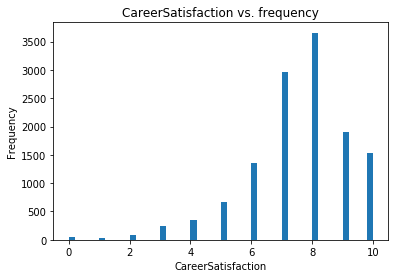

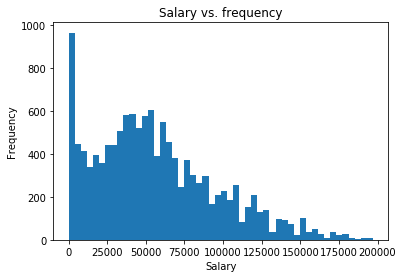

In [55]:
for column in hist_set_1d:
    histogram_matplotlib(hist_set_1d[column].dropna())

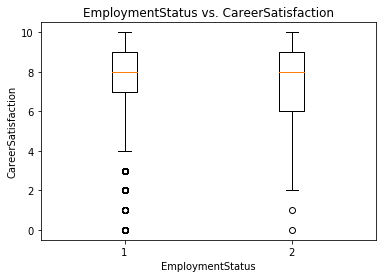

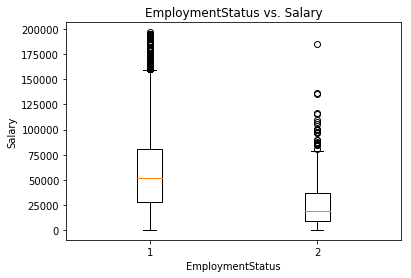

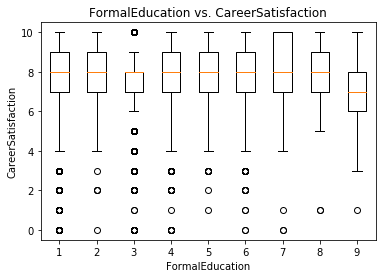

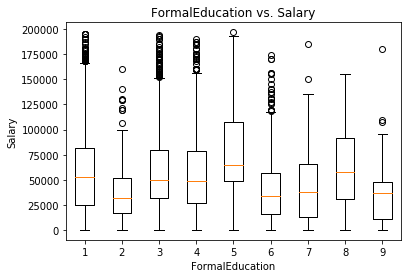

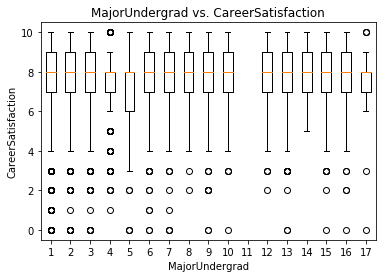

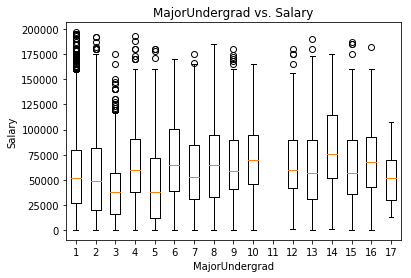

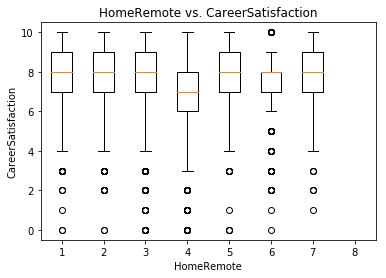

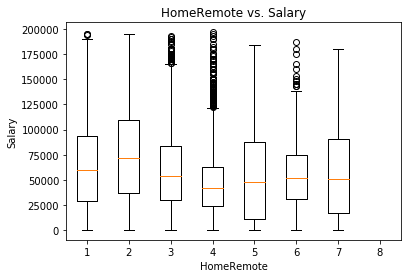

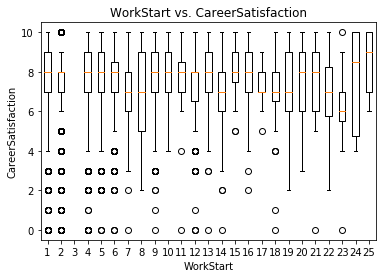

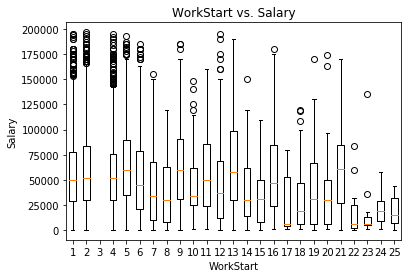

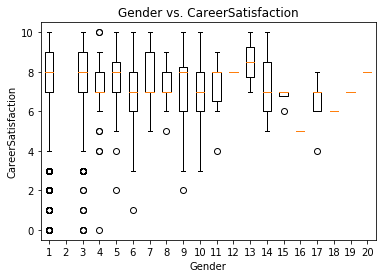

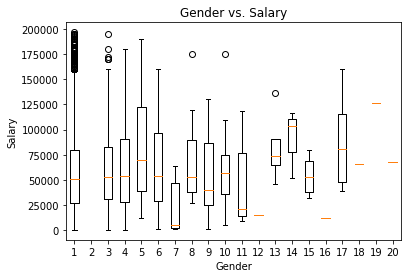

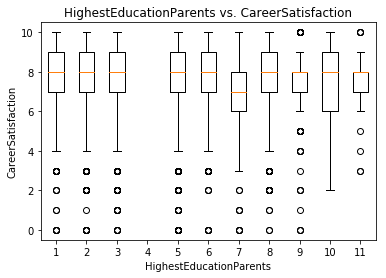

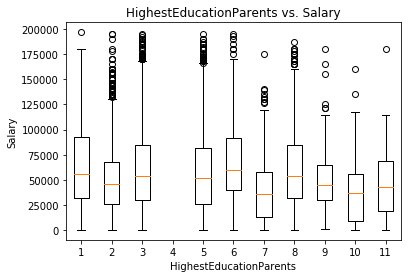

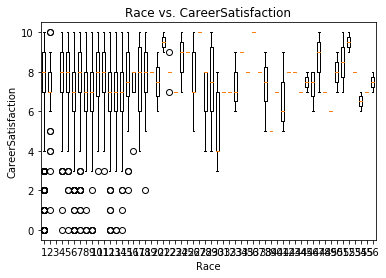

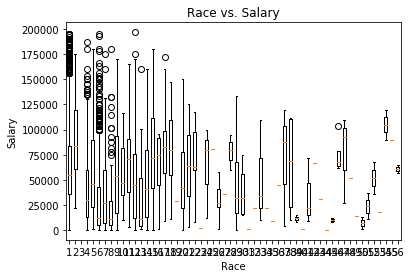

In [69]:
for catcol in barplot_set_1d:
    for numcol in hist_set_1d:
        boxplot_matplotlib(barplot_set_1d[catcol], hist_set_1d[numcol])

In [147]:
# Note: have to register for an account and set up an authentication file
# Everything is written in JavaScript and then wrapped in Python functions

import plotly.plotly as ply
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

def barplot_plotly(categorical_data):
    num_counts = categorical_data.value_counts()
    data = [ graph_objs.Bar(x=num_counts.name, 
                            y=num_counts.values) ]
    ply.iplot(data)
    
def histogram_plotly(numerical_data):
    data = [ graph_objs.Histogram(x=numerical_data) ]
    ply.iplot(data)

def boxplot_plotly(categorical_data, numerical_data):
    categories = categorical_data.unique()
    data = [ graph_objs.Box(x=categories,
                            y=numerical_data.values) ]
    ply.iplot(data)

In [141]:
for column in barplot_set_1d:
    barplot_plotly(barplot_set_1d[column].dropna())

In [142]:
for column in hist_set_1d:
    histogram_plotly(hist_set_1d[column].dropna())

In [148]:
for catcol in barplot_set_1d:
    for numcol in hist_set_1d:
        boxplot_plotly(barplot_set_1d[catcol], hist_set_1d[numcol])

In [120]:
import seaborn as sns
sns.set()

def barplot_seaborn(categorical_data):
    categories = categorical_data.unique()
    num_counts = categorical_data.value_counts()
    sns.barplot(categories, num_counts.values)
    plt.show()
    
def histogram_seaborn(numerical_data):
    sns.distplot(numerical_data, kde=False)
    plt.show()

def boxplot_seaborn(categorical_data, numerical_data):
    # trying to figure this out, probably easier than in others
    categories = categorical_data.unique()
    numerical_data.dropna()
    sns.boxplot(data=numerical_data.data)
    plt.show()

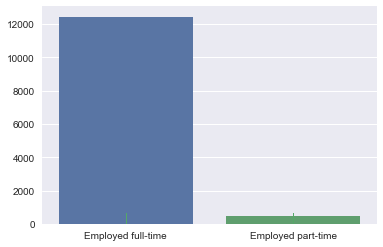

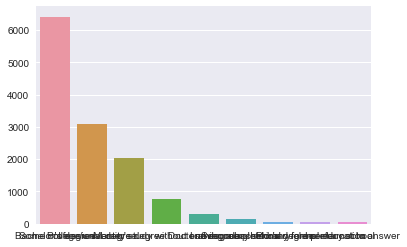

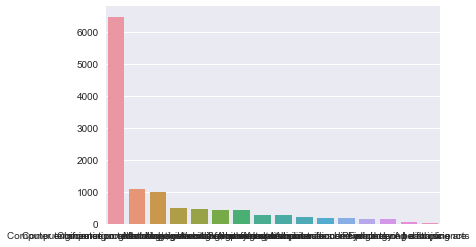

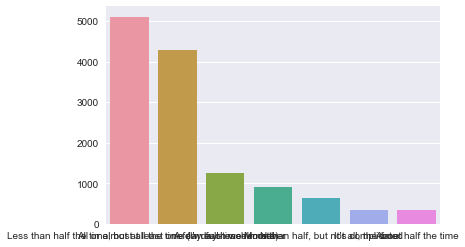

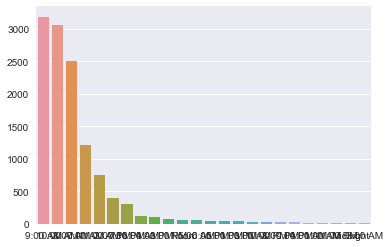

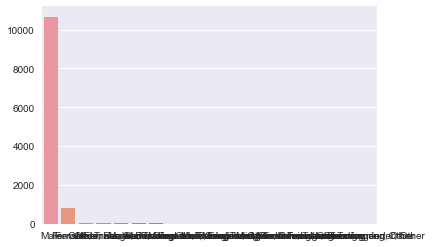

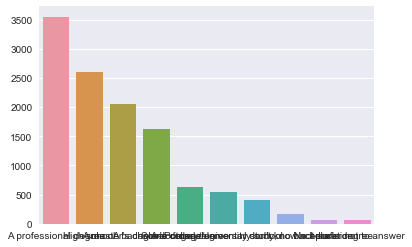

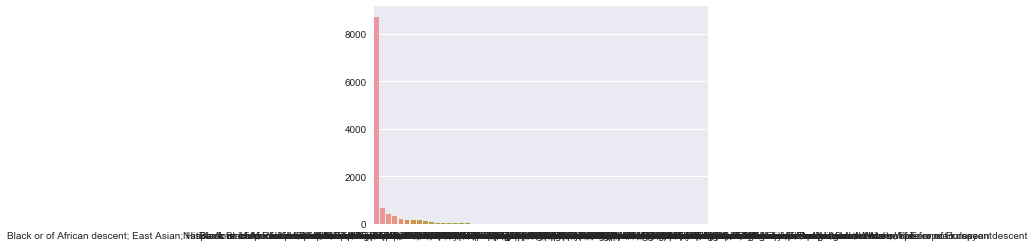

In [111]:
for column in barplot_set_1d:
    barplot_seaborn(barplot_set_1d[column].dropna())

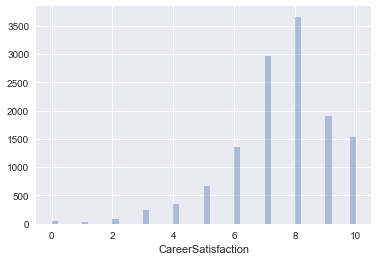

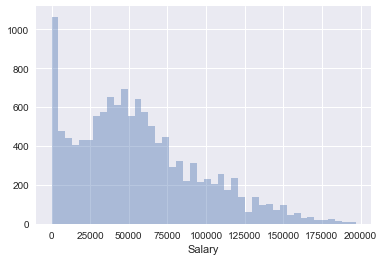

In [116]:
for column in hist_set_1d:
    histogram_seaborn(hist_set_1d[column].dropna())

In [121]:
for catcol in barplot_set_1d:
    for numcol in hist_set_1d:
        boxplot_seaborn(barplot_set_1d[catcol], hist_set_1d[numcol])

[<memory at 0x7f35bfaa4708>, <memory at 0x7f35bfaa4408>]


ValueError: setting an array element with a sequence.

In [138]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure

output_notebook()

def barplot_bokeh(categorical_data):
    categories = categorical_data.unique()
    counts = categorical_data.value_counts()
    source = bokeh.models.ColumnDataSource(data=dict(categories=categories, counts=counts))
    p = figure()
    p.vbar(x='categories', top='counts', width=0.9, source=source)
    show(p)
    

def histogram_bokeh(numerical_data):
    pass


def boxplot_bokeh(categorical_data, numerical_data):
    pass

Loading BokehJS ...

In [139]:
for column in barplot_set_1d:
    barplot_bokeh(barplot_set_1d[column].dropna())

In [ ]:
for column in hist_set_1d:
    histogram_bokeh(hist_set_1d[column].dropna())

In [ ]:
for catcol in barplot_set_1d:
    for numcol in hist_set_1d:
        boxplot_bokeh(barplot_set_1d[catcol], hist_set_1d[numcol])